# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


 ## 2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [5]:
df.shape

(541909, 8)

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df.dropna() # supress the rows who contain na values

In [8]:
df.shape

(406829, 8)

In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df=df.drop_duplicates() 

In [11]:
df.shape

(401604, 8)

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## 3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


## Detecting outliers

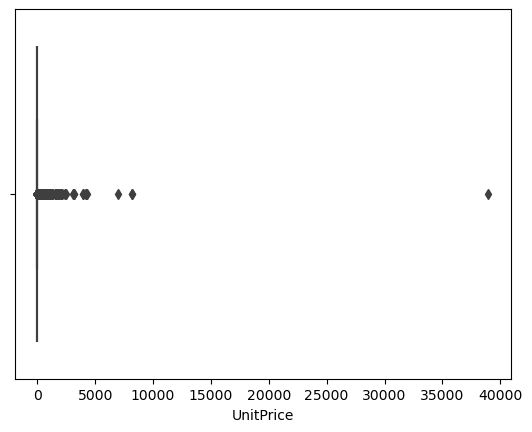

In [14]:
sns.boxplot(x=df.UnitPrice)
plt.show()

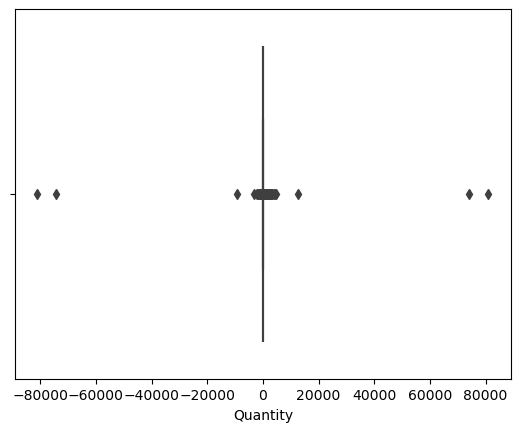

In [15]:
sns.boxplot(x=df.Quantity)
plt.show()

In [16]:
numeric_df = df.select_dtypes(include=[np.number])

In [17]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity        10.0
UnitPrice        2.5
CustomerID    2845.0
dtype: float64


In [18]:
numeric_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) |(numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
numeric_df.shape

(339453, 3)

## 4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

In [19]:
numeric_df.head(2)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0


## Histogram

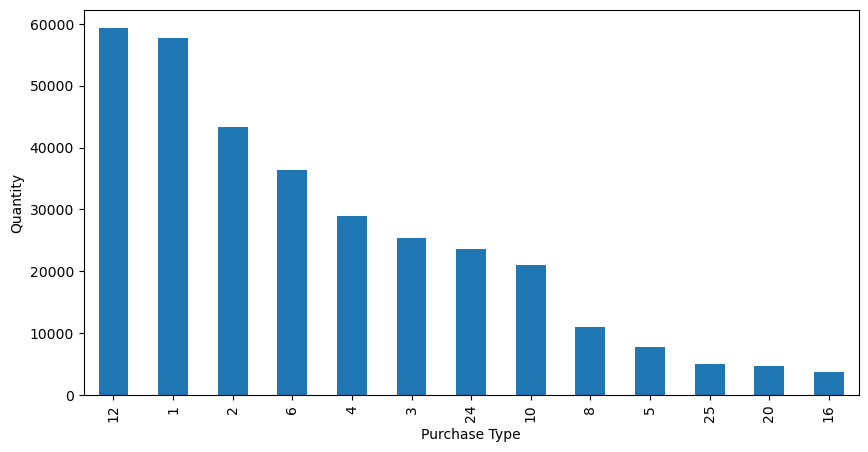

In [20]:
numeric_df.Quantity.value_counts().nlargest(13).plot(kind='bar', figsize=(10,5))
plt.ylabel('Quantity')
plt.xlabel('Purchase Type');

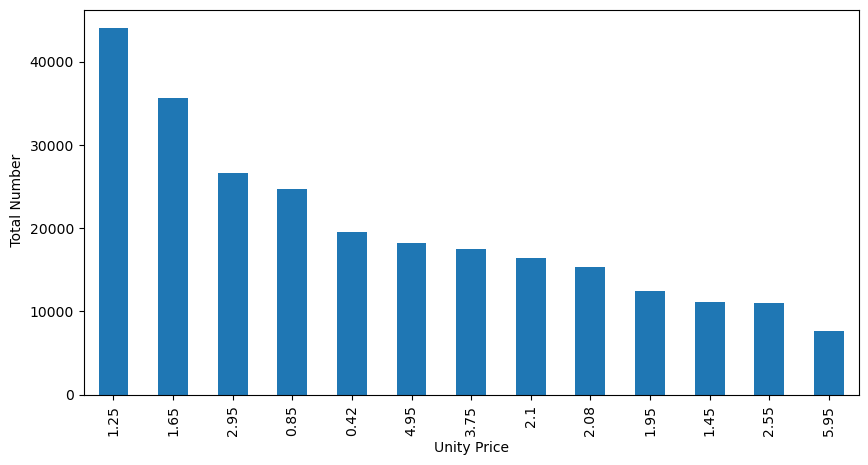

In [21]:
numeric_df.UnitPrice.value_counts().nlargest(13).plot(kind='bar', figsize=(10,5))
plt.ylabel(' Total Number')
plt.xlabel('Unity Price');

In [22]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## 5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.¶

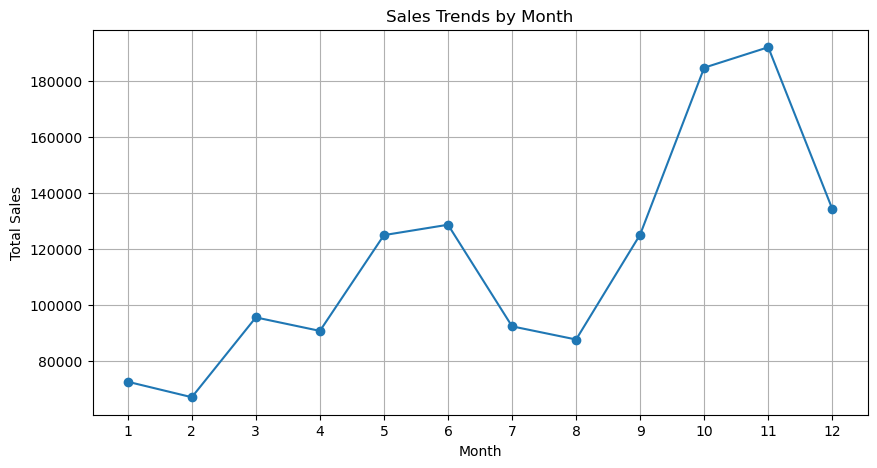

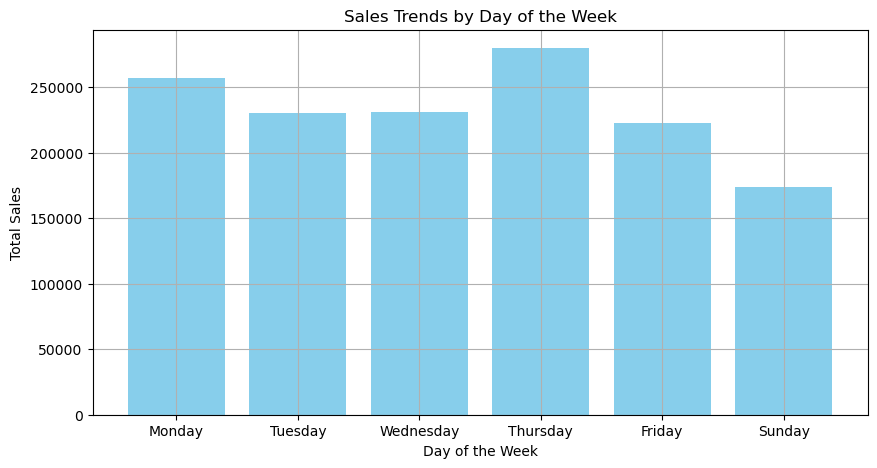

In [23]:
# Extraire le mois et le jour de la semaine
df['month'] = df.InvoiceDate.dt.month
df['day_of_week'] = df.InvoiceDate.dt.dayofweek

# Grouper par mois et calculer la somme des ventes
monthly_sales = df.groupby('month')['UnitPrice'].sum().reset_index()

# Grouper par jour de la semaine et calculer la somme des ventes
weekly_sales = df.groupby('day_of_week')['UnitPrice'].sum().reset_index()

# Renommer les jours de la semaine pour une meilleure lisibilité
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekly_sales['day_of_week'] = weekly_sales['day_of_week'].map(days)

# Visualiser les ventes mensuelles
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['UnitPrice'], marker='o')
plt.title('Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(monthly_sales['month'])
plt.show()

# Visualiser les ventes par jour de la semaine
plt.figure(figsize=(10, 5))
plt.bar(weekly_sales['day_of_week'], weekly_sales['UnitPrice'], color='skyblue')
plt.title('Sales Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


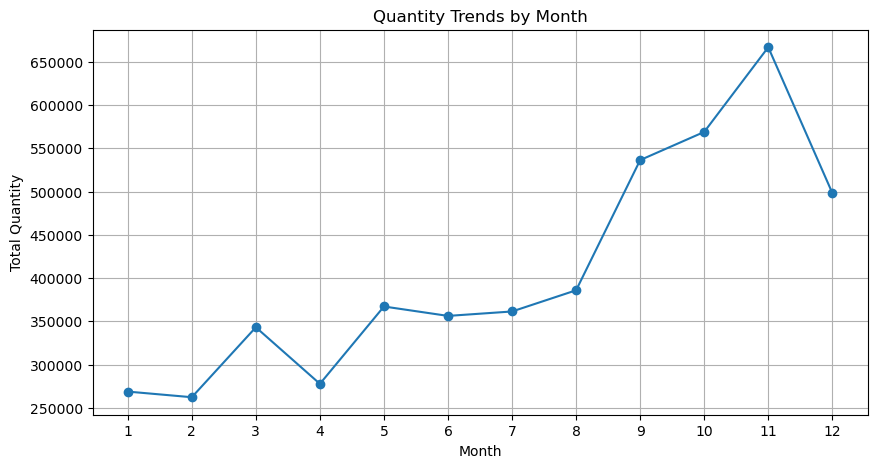

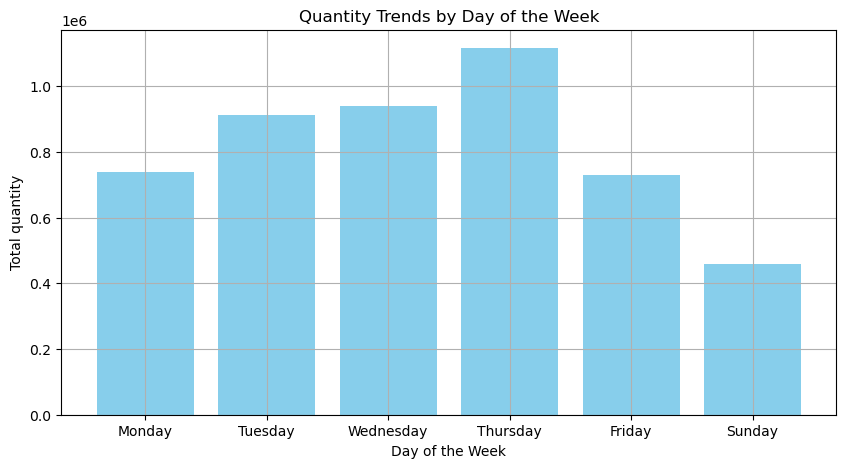

In [24]:
# Extraire le mois et le jour de la semaine
df['month'] = df.InvoiceDate.dt.month
df['day_of_week'] = df.InvoiceDate.dt.dayofweek

# Grouper par mois et calculer la somme des ventes
monthly_sales = df.groupby('month')['Quantity'].sum().reset_index()

# Grouper par jour de la semaine et calculer la somme des ventes
weekly_sales = df.groupby('day_of_week')['Quantity'].sum().reset_index()

# Renommer les jours de la semaine pour une meilleure lisibilité
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekly_sales['day_of_week'] = weekly_sales['day_of_week'].map(days)

# Visualiser les ventes mensuelles
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['Quantity'], marker='o')
plt.title('Quantity Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.xticks(monthly_sales['month'])
plt.show()

# Visualiser les ventes par jour de la semaine
plt.figure(figsize=(10, 5))
plt.bar(weekly_sales['day_of_week'], weekly_sales['Quantity'], color='skyblue')
plt.title('Quantity Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total quantity')
plt.grid(True)
plt.show()


In [25]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2


The busiest month is november and the busiest day of week is thursday.

## 6. Explore the top-selling products and countries based on the quantity sold.

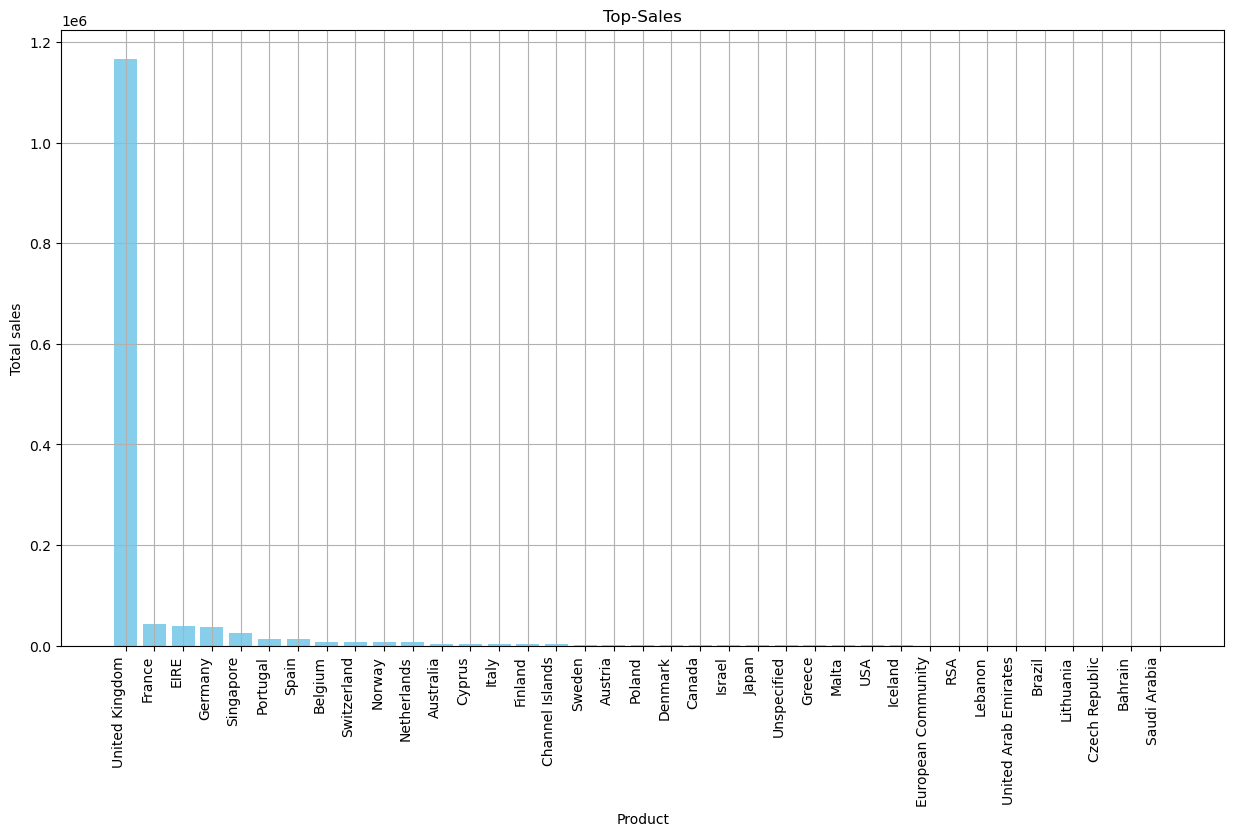

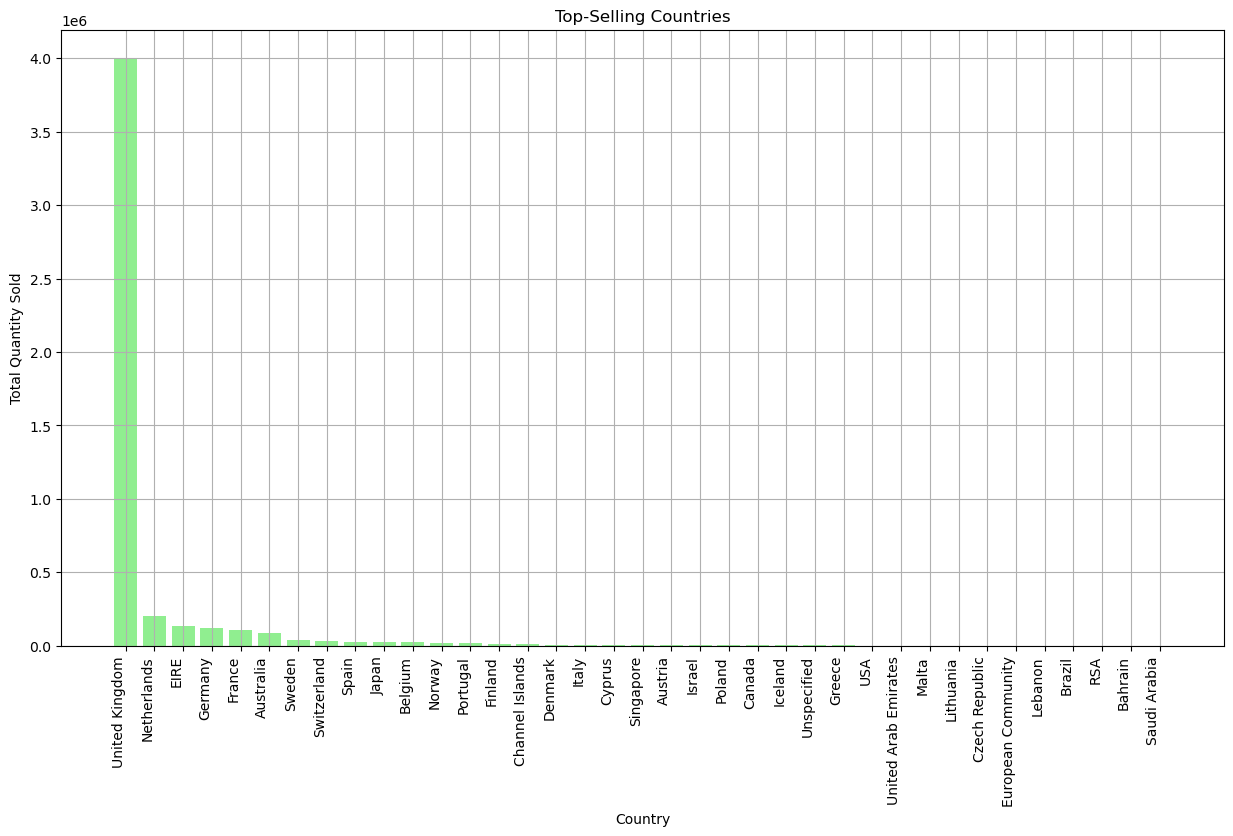

Top-Sales:
                 Country    UnitPrice
35        United Kingdom  1165878.034
13                France    42825.230
10                  EIRE    38209.260
14               Germany    37633.440
29             Singapore    25108.890
26              Portugal    12903.250
30                 Spain    12621.500
3                Belgium     7540.130
32           Switzerland     6568.600
24                Norway     6529.060
23           Netherlands     6492.550
0              Australia     4048.000
7                 Cyprus     3880.040
18                 Italy     3879.390
12               Finland     3786.850
6        Channel Islands     3736.900
31                Sweden     1804.730
1                Austria     1701.520
25                Poland     1422.270
9                Denmark     1266.950
5                 Canada      910.580
17                Israel      906.650
19                 Japan      814.860
36           Unspecified      775.950
15                Greece      713.290
2

In [27]:
# Group by product and calculate the total quantity sold for each product
product_sales = df.groupby('Country')['UnitPrice'].sum().reset_index().sort_values(by='UnitPrice', ascending=False)

# Group by country and calculate the total quantity sold for each country
country_sales = df.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

# Plot top-selling products
plt.figure(figsize=(15, 8))
plt.bar(product_sales['Country'], product_sales['UnitPrice'], color='skyblue')
plt.title('Top-Sales')
plt.xlabel('Product')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.show()

# Plot top-selling countries
plt.figure(figsize=(15, 8))
plt.bar(country_sales['Country'], country_sales['Quantity'], color='lightgreen')
plt.title('Top-Selling Countries')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.show()

print("Top-Sales:")
print(product_sales)

print("\nTop-Selling Countries:")
print(country_sales)
Sum_Prices=pd.DataFrame(product_sales)
Country_Sales=pd.DataFrame(country_sales)


## 7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [32]:
# Calcul de l'Interquartile Range (IQR) pour détecter les outliers
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

print("Outliers:")
print(outliers)

mean_without_outliers = df[~df.index.isin(outliers.index)]['Quantity'].mean()
mean_with_outliers = df['Quantity'].mean()

print(f"\nMean Quantity Sold without Outliers: {mean_without_outliers}")
print(f"Mean Quantity Sold with Outliers: {mean_with_outliers}")

Outliers:
       InvoiceNo StockCode                       Description  Quantity  \
9         536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
31        536370     10002       INFLATABLE POLITICAL GLOBE         48   
44        536370     22492           MINI PAINT SET VINTAGE         36   
46        536371     22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258        VICTORIAN SEWING BOX LARGE        32   
...          ...       ...                               ...       ...   
541835    581579     23581            JUMBO BAG PAISLEY PARK        40   
541865    581583     20725           LUNCH BAG RED RETROSPOT        40   
541866    581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867    581584     20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868    581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   

               InvoiceDate  UnitPrice  CustomerID         Country  month  \
9      2010-12-01 08:34:0

## 8. Draw conclusions and summarize your findings from the exploratory data analysis.